# Movie Recommendation System- First Attempt 

In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv("movies.csv")

In [5]:
df.head(10)

,id,title,tagline,description,genres,keywords,date,collection,runtime,revenue,...,director,cast,production_companies,production_countries,popularity,average_vote,num_votes,language,imdb_id,poster_url
0,862,Toy Story,NaN,"Led by Woody, Andy's toys live happily in his ...","animation, comedy, family","jealousy, toy, boy, friendship, friends, rival...",1995-10-30,Toy Story Collection,81.0,373554033.0,...,John Lasseter,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",Pixar Animation Studios,United States of America,21.946943,7.7,5415.0,en,tt0114709,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1,8844,Jumanji,Roll the dice and unleash the excitement!,When siblings Judy and Peter discover an encha...,"adventure, fantasy, family","board game, disappearance, based on children's...",1995-12-15,NaN,104.0,262797249.0,...,Joe Johnston,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","TriStar Pictures, Teitler Film, Interscope Com...",United States of America,17.015539,6.9,2413.0,en,tt0113497,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,A family wedding reignites the ancient feud be...,"romance, comedy","fishing, best friend, duringcreditsstinger, ol...",1995-12-22,Grumpy Old Men Collection,101.0,0.0,...,Howard Deutch,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...","Warner Bros., Lancaster Gate",United States of America,11.712900,6.5,92.0,en,tt0113228,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,"Cheated on, mistreated and stepped on, the wom...","comedy, drama, romance","based on novel, interracial relationship, sing...",1995-12-22,NaN,127.0,81452156.0,...,Forest Whitaker,"Whitney Houston, Angela Bassett, Loretta Devin...",Twentieth Century Fox Film Corporation,United States of America,3.859495,6.1,34.0,en,tt0114885,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,Just when George Banks has recovered from his ...,comedy,"baby, midlife crisis, confidence, aging, daugh...",1995-02-10,Father of the Bride Collection,106.0,76578911.0,...,Charles Shyer,"Steve Martin, Diane Keaton, Martin Short, Kimb...","Sandollar Productions, Touchstone Pictures",United States of America,8.387519,5.7,173.0,en,tt0113041,/e64sOI48hQXyru7naBFyssKFxVd.jpg
5,949,Heat,A Los Angeles Crime Saga,"Obsessive master thief, Neil McCauley leads a ...","action, crime, drama, thriller","robbery, detective, bank, obsession, chase, sh...",1995-12-15,NaN,170.0,187436818.0,...,Michael Mann,"Al Pacino, Robert De Niro, Val Kilmer, Jon Voi...","Regency Enterprises, Forward Pass, Warner Bros.",United States of America,17.924927,7.7,1886.0,en,tt0113277,/zMyfPUelumio3tiDKPffaUpsQTD.jpg
6,11860,Sabrina,You are cordially invited to the most surprisi...,An ugly duckling having undergone a remarkable...,"comedy, romance","paris, brother brother relationship, chauffeur...",1995-12-15,NaN,127.0,0.0,...,Sydney Pollack,"Harrison Ford, Julia Ormond, Greg Kinnear, Ang...","Paramount Pictures, Scott Rudin Productions, M...","Germany, United States of America",6.677277,6.2,141.0,en,tt0114319,/jQh15y5YB7bWz1NtffNZmRw0s9D.jpg
7,45325,Tom and Huck,The Original Bad Boys.,"A mischievous young boy, Tom Sawyer, witnesses...","action, adventure, drama, family",NaN,1995-12-22,NaN,97.0,0.0,...,Peter Hewitt,"Jonathan Taylor Thomas, Brad Renfro, Rachael L...",Walt Disney Pictures,United States of America,2.561161,5.4,45.0,en,tt0112302,/sGO5Qa55p7wTu7FJcX4H4xIVKvS.jpg
8,9091,Sudden Death,Terror goes into overtime.,International action superstar Jean Claude Van...,"action, adventure, thriller","terrorist, hostage, explosive, vice president",1995-12-22,NaN,106.0,64350171.0,...,Peter Hyams,"Jean-Claude Van Damme, Powers Boothe, Dorian H...","Universal Pictures, Imperial Entertainment, Si...",United States of America,5.231580,5.5,174.0,en,tt0114576,/eoWvKD60lT95Ss1MYNgVExpo5iU.jpg
9,710,GoldenEye,No limits. No fears. No sub

In [8]:
df.tail()

,id,title,tagline,description,genres,keywords,date,collection,runtime,revenue,...,director,cast,production_companies,production_countries,popularity,average_vote,num_votes,language,imdb_id,poster_url
46623,439050,Subdue,Rising and falling between a man and woman,Rising and falling between a man and woman.,"drama, family",tragic love,NaN,NaN,90.0,0.0,...,Hamid Nematollah,"Leila Hatami, Kourosh Tahami, Elham Korda",NaN,Iran,0.072051,4.0,1.0,fa,tt6209470,/jldsYflnId4tTWPx8es3uzsB1I8.jpg
46624,111109,Century of Birthing,NaN,An artist struggles to finish his work while a...,drama,"artist, play, pinoy",2011-11-17,NaN,360.0,0.0,...,Lav Diaz,"Angel Aquino, Perry Dizon, Hazel Orencio, Joel...",Sine Olivia,Philippines,0.178241,9.0,3.0,tl,tt2028550,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg
46625,67758,Betrayal,A deadly game of wits.,"When one of her hits goes wrong, a professiona...","action, drama, thriller",NaN,2003-08-01,NaN,90.0,0.0,...,Mark L. Lester,"Erika Eleniak, Adam Baldwin, Julie du Page, Ja...",American World Pictures,United States of America,0.903007,3.8,6.0,en,tt0303758,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg
46626,227506,Satan Triumphant,NaN,"In a small town live two brothers, one a minis...",NaN,NaN,1917-10-21,NaN,87.0,0.0,...,Yakov Protazanov,"Iwan Mosschuchin, Nathalie Lissenko, Pavel Pav...",Yermoliev,Russia,0.003503,0.0,0.0,en,tt0008536,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg
46627,461257,Queerama,NaN,50 years after decriminalisation of homosexual...,NaN,NaN,2017-06-09,NaN,75.0,0.0,...,Daisy Asquith,NaN,NaN,United Kingdom,0.163015,0.0,0.0,en,tt6980792,/s5UkZt6NTsrS7ZF0Rh8nzupRlIU.jpg


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46628 entries, 0 to 46627
Data columns (total 21 columns):
id                      46628 non-null int64
title                   46624 non-null object
tagline                 20783 non-null object
description             45633 non-null object
genres                  44104 non-null object
keywords                31739 non-null object
date                    46540 non-null object
collection              4574 non-null object
runtime                 46360 non-null float64
revenue                 46624 non-null float64
budget                  46628 non-null int64
director                45711 non-null object
cast                    44137 non-null object
production_companies    34346 non-null object
production_countries    40132 non-null object
popularity              46624 non-null float64
average_vote            46624 non-null float64
num_votes               46624 non-null float64
language                46617 non-null object
imdb_id        

In [10]:
df.count()

id                      46628
title                   46624
tagline                 20783
description             45633
genres                  44104
keywords                31739
date                    46540
collection               4574
runtime                 46360
revenue                 46624
budget                  46628
director                45711
cast                    44137
production_companies    34346
production_countries    40132
popularity              46624
average_vote            46624
num_votes               46624
language                46617
imdb_id                 46611
poster_url              46229
dtype: int64

In [11]:
df.shape

(46628, 21)

In [12]:
df.isnull().sum()

id                          0
title                       4
tagline                 25845
description               995
genres                   2524
keywords                14889
date                       88
collection              42054
runtime                   268
revenue                     4
budget                      0
director                  917
cast                     2491
production_companies    12282
production_countries     6496
popularity                  4
average_vote                4
num_votes                   4
language                   11
imdb_id                    17
poster_url                399
dtype: int64

## Except id and budget, all columns have missing values. 

In [13]:
df.isnull().sum().sum()

109296

In [14]:
df.isnull().values.any()

True

In [15]:
# average value of votes for all movies 
avg_vote= df['average_vote'].mean()
avg_vote


5.611727865476706

In [16]:
df['genres'].value_counts()

drama                                                        5148
comedy                                                       3701
documentary                                                  2816
drama, romance                                               1334
comedy, drama                                                1168
                                                             ... 
fantasy, animation, horror, action, science fiction             1
horror, fantasy, action, adventure, mystery, crime, drama       1
thriller, horror, tv movie                                      1
war, drama, history, thriller                                   1
adventure, mystery, science fiction                             1
Name: genres, Length: 4065, dtype: int64

In [17]:
df['director'].value_counts()

John Ford              67
Michael Curtiz         66
Werner Herzog          55
Julien Duvivier        54
Alfred Hitchcock       53
                       ..
Rich Moore              1
Andrew Lane             1
Richard Goldgewicht     1
Ray Ashley              1
Nicolette Krebitz       1
Name: director, Length: 17572, dtype: int64

In [18]:
df['language'].value_counts()

en    32937
fr     2524
it     1565
ja     1420
de     1111
      ...  
eo        1
hy        1
fy        1
sm        1
si        1
Name: language, Length: 89, dtype: int64

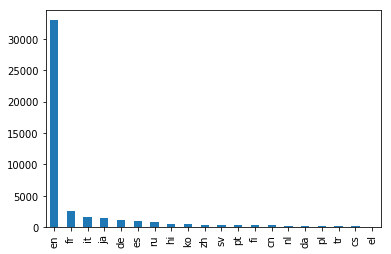

In [19]:
df['language'].value_counts()[:20].plot(kind='bar')

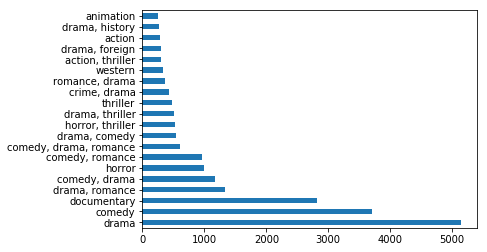

In [20]:
df['genres'].value_counts()[:20].plot(kind='barh')

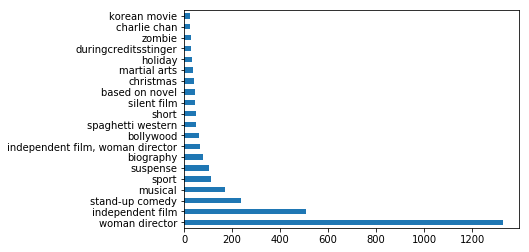

In [21]:
df['keywords'].value_counts()[:20].plot(kind='barh')

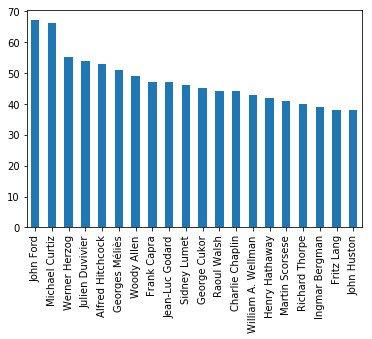

In [22]:
df['director'].value_counts()[:20].plot(kind='bar')

# Summary Statistics 

In [23]:
df.describe()

,id,runtime,revenue,budget,popularity,average_vote,num_votes
count,46628.000000,46360.000000,4.662400e+04,4.662800e+04,46624.000000,46624.000000,46624.000000
mean,109678.820837,94.086885,1.102765e+07,4.163636e+06,2.894411,5.611728,108.169719
std,112908.126984,38.454015,6.380526e+07,1.727426e+07,5.950483,1.932157,486.429314
min,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,26760.250000,85.000000,0.000000e+00,0.000000e+00,0.382721,5.000000,3.000000
50%,61299.000000,95.000000,0.000000e+00,0.000000e+00,1.115187,6.000000,10.000000
75%,159624.000000,107.000000,0.000000e+00,0.000000e+00,3.610563,6.800000,34.000000
max,469172.000000,1256.000000,2.787965e+09,3.800000e+08,547.488298,10.000000,14075.000000


75% of the average vote (rating) lies below 6.8
For average vote, is '0' considered a missing value or a zero rating because the movie is abysmal?

In [24]:
df.describe(include=["O"])

,title,tagline,description,genres,keywords,date,collection,director,cast,production_companies,production_countries,language,imdb_id,poster_url
count,46624,20783,45633,44104,31739,46540,4574,45711,44137,34346,40132,46617,46611,46229
unique,42276,20283,44305,4065,25988,17333,1695,17572,42677,22670,2389,89,45415,45020
top,Blackout,Which one is the first to return - memory or t...,No overview found.,drama,woman director,2008-01-01,Pokémon Collection,John Ford,"Petteri Summanen, Ismo Kallio, Eppu Salminen, ...",Metro-Goldwyn-Mayer (MGM),United States of America,en,tt1180333,/8VSZ9coCzxOCW2wE2Qene1H1fKO.jpg
freq,31,27,136,5148,1329,138,34,67,27,746,18126,32937,27,27


In [25]:
df.columns.values 

array(['id', 'title', 'tagline', 'description', 'genres', 'keywords',
       'date', 'collection', 'runtime', 'revenue', 'budget', 'director',
       'cast', 'production_companies', 'production_countries',
       'popularity', 'average_vote', 'num_votes', 'language', 'imdb_id',
       'poster_url'], dtype=object)

In [26]:
df.head()

,id,title,tagline,description,genres,keywords,date,collection,runtime,revenue,...,director,cast,production_companies,production_countries,popularity,average_vote,num_votes,language,imdb_id,poster_url
0,862,Toy Story,NaN,"Led by Woody, Andy's toys live happily in his ...","animation, comedy, family","jealousy, toy, boy, friendship, friends, rival...",1995-10-30,Toy Story Collection,81.0,373554033.0,...,John Lasseter,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",Pixar Animation Studios,United States of America,21.946943,7.7,5415.0,en,tt0114709,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1,8844,Jumanji,Roll the dice and unleash the excitement!,When siblings Judy and Peter discover an encha...,"adventure, fantasy, family","board game, disappearance, based on children's...",1995-12-15,NaN,104.0,262797249.0,...,Joe Johnston,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","TriStar Pictures, Teitler Film, Interscope Com...",United States of America,17.015539,6.9,2413.0,en,tt0113497,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,A family wedding reignites the ancient feud be...,"romance, comedy","fishing, best friend, duringcreditsstinger, ol...",1995-12-22,Grumpy Old Men Collection,101.0,0.0,...,Howard Deutch,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...","Warner Bros., Lancaster Gate",United States of America,11.712900,6.5,92.0,en,tt0113228,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,"Cheated on, mistreated and stepped on, the wom...","comedy, drama, romance","based on novel, interracial relationship, sing...",1995-12-22,NaN,127.0,81452156.0,...,Forest Whitaker,"Whitney Houston, Angela Bassett, Loretta Devin...",Twentieth Century Fox Film Corporation,United States of America,3.859495,6.1,34.0,en,tt0114885,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,Just when George Banks has recovered from his ...,comedy,"baby, midlife crisis, confidence, aging, daugh...",1995-02-10,Father of the Bride Collection,106.0,76578911.0,...,Charles Shyer,"Steve Martin, Diane Keaton, Martin Short, Kimb...","Sandollar Productions, Touchstone Pictures",United States of America,8.387519,5.7,173.0,en,tt0113041,/e64sOI48hQXyru7naBFyssKFxVd.jpg


In [27]:
df.isnull().sum()

id                          0
title                       4
tagline                 25845
description               995
genres                   2524
keywords                14889
date                       88
collection              42054
runtime                   268
revenue                     4
budget                      0
director                  917
cast                     2491
production_companies    12282
production_countries     6496
popularity                  4
average_vote                4
num_votes                   4
language                   11
imdb_id                    17
poster_url                399
dtype: int64

In [28]:
df.shape

(46628, 21)

In [29]:
df = df.drop(['keywords','tagline','collection','production_companies','production_countries','imdb_id'], axis=1)
df.head()

,id,title,description,genres,date,runtime,revenue,budget,director,cast,popularity,average_vote,num_votes,language,poster_url
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","animation, comedy, family",1995-10-30,81.0,373554033.0,30000000,John Lasseter,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",21.946943,7.7,5415.0,en,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,"adventure, fantasy, family",1995-12-15,104.0,262797249.0,65000000,Joe Johnston,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",17.015539,6.9,2413.0,en,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,"romance, comedy",1995-12-22,101.0,0.0,0,Howard Deutch,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...",11.712900,6.5,92.0,en,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","comedy, drama, romance",1995-12-22,127.0,81452156.0,16000000,Forest Whitaker,"Whitney Houston, Angela Bassett, Loretta Devin...",3.859495,6.1,34.0,en,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,comedy,1995-02-10,106.0,76578911.0,0,Charles Shyer,"Steve Martin, Diane Keaton, Martin Short, Kimb...",8.387519,5.7,173.0,en,/e64sOI48hQXyru7naBFyssKFxVd.jpg


## Exploring this dataset a little further 

# Most expensive movie

In [30]:


df.loc[df['budget'].idxmax()]

id                                                           1865
title                 Pirates of the Caribbean: On Stranger Tides
description     Captain Jack Sparrow crosses paths with a woma...
genres                                 adventure, action, fantasy
date                                                   2011-05-14
runtime                                                       136
revenue                                               1.04571e+09
budget                                                  380000000
director                                             Rob Marshall
cast            Johnny Depp, Penélope Cruz, Ian McShane, Kevin...
popularity                                                27.8877
average_vote                                                  6.4
num_votes                                                    5068
language                                                       en
poster_url                       /wNUDAq5OUMOtxMlz64YaCp7gZma.jpg
Name: 1730

In [31]:
df[df['budget']==df['budget'].max()]

,id,title,description,genres,date,runtime,revenue,budget,director,cast,popularity,average_vote,num_votes,language,poster_url
17307,1865,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,"adventure, action, fantasy",2011-05-14,136.0,1.045714e+09,380000000,Rob Marshall,"Johnny Depp, Penélope Cruz, Ian McShane, Kevin...",27.88772,6.4,5068.0,en,/wNUDAq5OUMOtxMlz64YaCp7gZma.jpg


# Most profitable movie

In [32]:


df.loc[df['revenue'].idxmax()]

id                                                          19995
title                                                      Avatar
description     In the 22nd century, a paraplegic Marine is di...
genres                action, adventure, fantasy, science fiction
date                                                   2009-12-10
runtime                                                       162
revenue                                               2.78797e+09
budget                                                  237000000
director                                            James Cameron
cast            Sam Worthington, Zoe Saldana, Sigourney Weaver...
popularity                                                185.071
average_vote                                                  7.2
num_votes                                                   12114
language                                                       en
poster_url                       /kmcqlZGaSh20zpTbuoF0Cdn07dT.jpg
Name: 1472

In [33]:
df[df['revenue']==df['revenue'].max()]

,id,title,description,genres,date,runtime,revenue,budget,director,cast,popularity,average_vote,num_votes,language,poster_url
14723,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","action, adventure, fantasy, science fiction",2009-12-10,162.0,2.787965e+09,237000000,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",185.070892,7.2,12114.0,en,/kmcqlZGaSh20zpTbuoF0Cdn07dT.jpg


# Longest movie. 21 hrs

In [34]:


df.loc[df['runtime'].idxmax()]

id                                                          67493
title                                                  Centennial
description     The economic and cultural growth of Colorado s...
genres                                             drama, history
date                                                   1978-10-01
runtime                                                      1256
revenue                                                         0
budget                                                          0
director                                          Virgil W. Vogel
cast            Richard Chamberlain, Richard Crenna, Raymond B...
popularity                                               0.664727
average_vote                                                  7.9
num_votes                                                       8
language                                                       en
poster_url                       /AoEgJrDVkzlgWugcaTxI03FiUXf.jpg
Name: 2438

In [35]:
df[df['runtime']==df['runtime'].max()]

,id,title,description,genres,date,runtime,revenue,budget,director,cast,popularity,average_vote,num_votes,language,poster_url
24380,67493,Centennial,The economic and cultural growth of Colorado s...,"drama, history",1978-10-01,1256.0,0.0,0,Virgil W. Vogel,"Richard Chamberlain, Richard Crenna, Raymond B...",0.664727,7.9,8.0,en,/AoEgJrDVkzlgWugcaTxI03FiUXf.jpg


# Movie with Max number of Votes

In [36]:


df.loc[df['num_votes'].idxmax()]

id                                                          27205
title                                                   Inception
description     Cobb, a skilled thief who commits corporate es...
genres          action, thriller, science fiction, mystery, ad...
date                                                   2010-07-14
runtime                                                       148
revenue                                               8.25533e+08
budget                                                  160000000
director                                        Christopher Nolan
cast            Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...
popularity                                                29.1081
average_vote                                                  8.1
num_votes                                                   14075
language                                                       en
poster_url                       /qmDpIHrmpJINaRKAfWQfftjCdyi.jpg
Name: 1565

In [37]:
df[df['num_votes']==df['num_votes'].max()]

,id,title,description,genres,date,runtime,revenue,budget,director,cast,popularity,average_vote,num_votes,language,poster_url
15651,27205,Inception,"Cobb, a skilled thief who commits corporate es...","action, thriller, science fiction, mystery, ad...",2010-07-14,148.0,825532764.0,160000000,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",29.108149,8.1,14075.0,en,/qmDpIHrmpJINaRKAfWQfftjCdyi.jpg


# Most Popular Movie

In [38]:


df.loc[df['popularity'].idxmax()]

id                                                         211672
title                                                     Minions
description     Minions Stuart, Kevin and Bob are recruited by...
genres                       family, animation, adventure, comedy
date                                                   2015-06-17
runtime                                                        91
revenue                                               1.15673e+09
budget                                                   74000000
director                                               Kyle Balda
cast            Sandra Bullock, Jon Hamm, Michael Keaton, Alli...
popularity                                                547.488
average_vote                                                  6.4
num_votes                                                    4729
language                                                       en
poster_url                        /q0R4crx2SehcEEQEkYObktdeFy.jpg
Name: 3091

In [39]:
df[df['popularity']==df['popularity'].max()]

,id,title,description,genres,date,runtime,revenue,budget,director,cast,popularity,average_vote,num_votes,language,poster_url
30910,211672,Minions,"Minions Stuart, Kevin and Bob are recruited by...","family, animation, adventure, comedy",2015-06-17,91.0,1.156731e+09,74000000,Kyle Balda,"Sandra Bullock, Jon Hamm, Michael Keaton, Alli...",547.488298,6.4,4729.0,en,/q0R4crx2SehcEEQEkYObktdeFy.jpg


# Number of movies with '10' Rating

In [40]:
df[df['average_vote']==df['average_vote'].max()]

,id,title,description,genres,date,runtime,revenue,budget,director,cast,popularity,average_vote,num_votes,language,poster_url
186,58372,Reckless,"On Christmas eve, a relentlessly cheerful woma...","fantasy, comedy, drama",1995-11-17,91.0,0.0,0,Norman René,"Mia Farrow, Tony Goldwyn, Scott Glenn, Mary-Lo...",0.119713,10.0,1.0,en,/mIEtFo5z8G6b0r2mxHjfIWT7vy7.jpg
394,278939,Girl in the Cadillac,A runaway teenage girl and a drifter rob a ban...,"romance, adventure, crime, drama",1995-10-24,89.0,0.0,0,Lucas Platt,"Эрика Элениак, William McNamara, Michael Lerne...",0.405392,10.0,1.0,en,/mxrZvc4eLuznyXsFXamQIftVB8J.jpg
713,73183,"The Haunted World of Edward D. Wood, Jr.",The strange life and the wonderfully awful fil...,documentary,1996-05-01,112.0,0.0,0,Brett Thompson,"Maila Nurmi, Dolores Fuller, Paul Marco, Bela ...",0.037443,10.0,1.0,en,/rarwGANB2L4EcxInVw1Q8TgcfU1.jpg
745,255546,Carmen Miranda: Bananas Is My Business,A biography of the Portuguese-Brazilian singer...,documentary,1995-04-13,91.0,0.0,0,Helena Solberg,"Carmen Miranda, Aurora Miranda, Cesar Romero, ...",0.146287,10.0,1.0,pt,/llDwjrtUdmLt09PuQhQvdJdK3Tl.jpg
1654,64562,Other Voices Other Rooms,Truman Capote's semi-autobiographical first no...,drama,1995-09-15,0.0,0.0,0,NaN,Anna Levine,0.036680,10.0,1.0,en,/AoJSXmiC0oQOmP1F7iKFuCEIKkP.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46210,405446,The Human Surge,"Buenos Aires. Exe, 25 years old, has just lost...",drama,2016-08-19,96.0,0.0,0,Eduardo Williams,"Chai Fonacier, Sergio Morosini, Shine Marx",0.484825,10.0,1.0,es,/cJTJL8KrFAtxxMuflfD0BJx4UQf.jpg
46361,412669,First Round Down,Tim Tucker (Dylan Bruce) was a star forward wh...,"action, comedy",2017-03-04,0.0,0.0,0,Brett M. Butler,"Dylan Bruce, Percy Hynes White",0.422836,10.0,1.0,en,/6oVIL0wnuBuQZkz2Dnc58FmCZkA.jpg
46414,28469,Der Herr Karl,No overview found.,comedy,1961-11-15,60.0,0.0,0,NaN,Helmut Qualtinger,0.192235,10.0,1.0,de,/hUeS1PrPH3Um9idkP42SqibNY5Z.jpg
46524,173874,The Many Faces of Christopher Lee,"Christopher Lee talks about his film career, w...",NaN,1996-01-01,60.0,0.0,0,Colin Webb,Christopher Lee,0.051939,10.0,1.0,en,/uYXdTmDTRY2hjMmPASl1vVHNqX0.jpg


### 196 movies have a rating 10

In [41]:
df = df.drop(['description'], axis=1)
df.head()

,id,title,genres,date,runtime,revenue,budget,director,cast,popularity,average_vote,num_votes,language,poster_url
0,862,Toy Story,"animation, comedy, family",1995-10-30,81.0,373554033.0,30000000,John Lasseter,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",21.946943,7.7,5415.0,en,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1,8844,Jumanji,"adventure, fantasy, family",1995-12-15,104.0,262797249.0,65000000,Joe Johnston,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",17.015539,6.9,2413.0,en,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2,15602,Grumpier Old Men,"romance, comedy",1995-12-22,101.0,0.0,0,Howard Deutch,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...",11.712900,6.5,92.0,en,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
3,31357,Waiting to Exhale,"comedy, drama, romance",1995-12-22,127.0,81452156.0,16000000,Forest Whitaker,"Whitney Houston, Angela Bassett, Loretta Devin...",3.859495,6.1,34.0,en,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg
4,11862,Father of the Bride Part II,comedy,1995-02-10,106.0,76578911.0,0,Charles Shyer,"Steve Martin, Diane Keaton, Martin Short, Kimb...",8.387519,5.7,173.0,en,/e64sOI48hQXyru7naBFyssKFxVd.jpg


In [42]:
df.head()

,id,title,genres,date,runtime,revenue,budget,director,cast,popularity,average_vote,num_votes,language,poster_url
0,862,Toy Story,"animation, comedy, family",1995-10-30,81.0,373554033.0,30000000,John Lasseter,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",21.946943,7.7,5415.0,en,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1,8844,Jumanji,"adventure, fantasy, family",1995-12-15,104.0,262797249.0,65000000,Joe Johnston,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",17.015539,6.9,2413.0,en,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2,15602,Grumpier Old Men,"romance, comedy",1995-12-22,101.0,0.0,0,Howard Deutch,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...",11.712900,6.5,92.0,en,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
3,31357,Waiting to Exhale,"comedy, drama, romance",1995-12-22,127.0,81452156.0,16000000,Forest Whitaker,"Whitney Houston, Angela Bassett, Loretta Devin...",3.859495,6.1,34.0,en,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg
4,11862,Father of the Bride Part II,comedy,1995-02-10,106.0,76578911.0,0,Charles Shyer,"Steve Martin, Diane Keaton, Martin Short, Kimb...",8.387519,5.7,173.0,en,/e64sOI48hQXyru7naBFyssKFxVd.jpg


In [43]:
df = df.drop(['poster_url'], axis=1)

In [44]:
df = df.drop(['id'], axis=1)
df.head()

,title,genres,date,runtime,revenue,budget,director,cast,popularity,average_vote,num_votes,language
0,Toy Story,"animation, comedy, family",1995-10-30,81.0,373554033.0,30000000,John Lasseter,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",21.946943,7.7,5415.0,en
1,Jumanji,"adventure, fantasy, family",1995-12-15,104.0,262797249.0,65000000,Joe Johnston,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",17.015539,6.9,2413.0,en
2,Grumpier Old Men,"romance, comedy",1995-12-22,101.0,0.0,0,Howard Deutch,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...",11.712900,6.5,92.0,en
3,Waiting to Exhale,"comedy, drama, romance",1995-12-22,127.0,81452156.0,16000000,Forest Whitaker,"Whitney Houston, Angela Bassett, Loretta Devin...",3.859495,6.1,34.0,en
4,Father of the Bride Part II,comedy,1995-02-10,106.0,76578911.0,0,Charles Shyer,"Steve Martin, Diane Keaton, Martin Short, Kimb...",8.387519,5.7,173.0,en


In [45]:
df.isnull().sum()

title              4
genres          2524
date              88
runtime          268
revenue            4
budget             0
director         917
cast            2491
popularity         4
average_vote       4
num_votes          4
language          11
dtype: int64

In [46]:
df.isnull().sum().sum()

6319

In [47]:
# Number of features- final 

df.columns

Index(['title', 'genres', 'date', 'runtime', 'revenue', 'budget', 'director',
       'cast', 'popularity', 'average_vote', 'num_votes', 'language'],
      dtype='object')

# Data Visualizations 

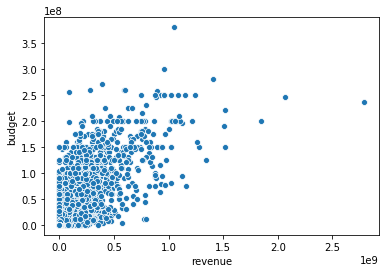

In [48]:
import seaborn as sns
sns.scatterplot(x='revenue', y='budget', data=df)

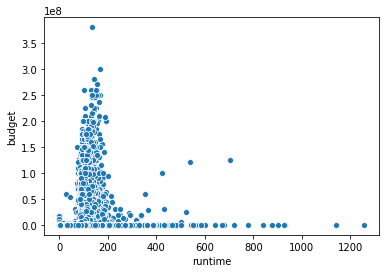

In [49]:
sns.scatterplot(x='runtime', y='budget', data=df)

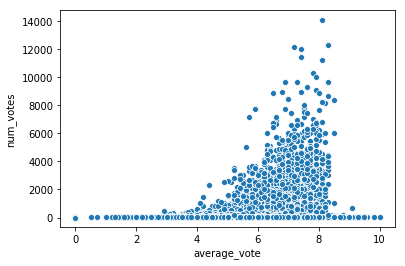

In [50]:
sns.scatterplot(x='average_vote', y='num_votes', data=df)

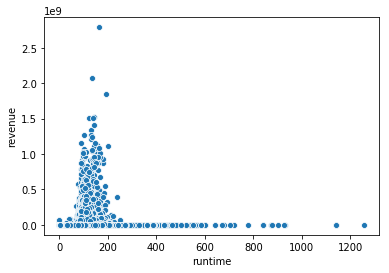

In [51]:
sns.scatterplot(x='runtime', y='revenue', data=df)

Movies that are below 180 mins made the most money.

/Users/lavanyasanthosh/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/lavanyasanthosh/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


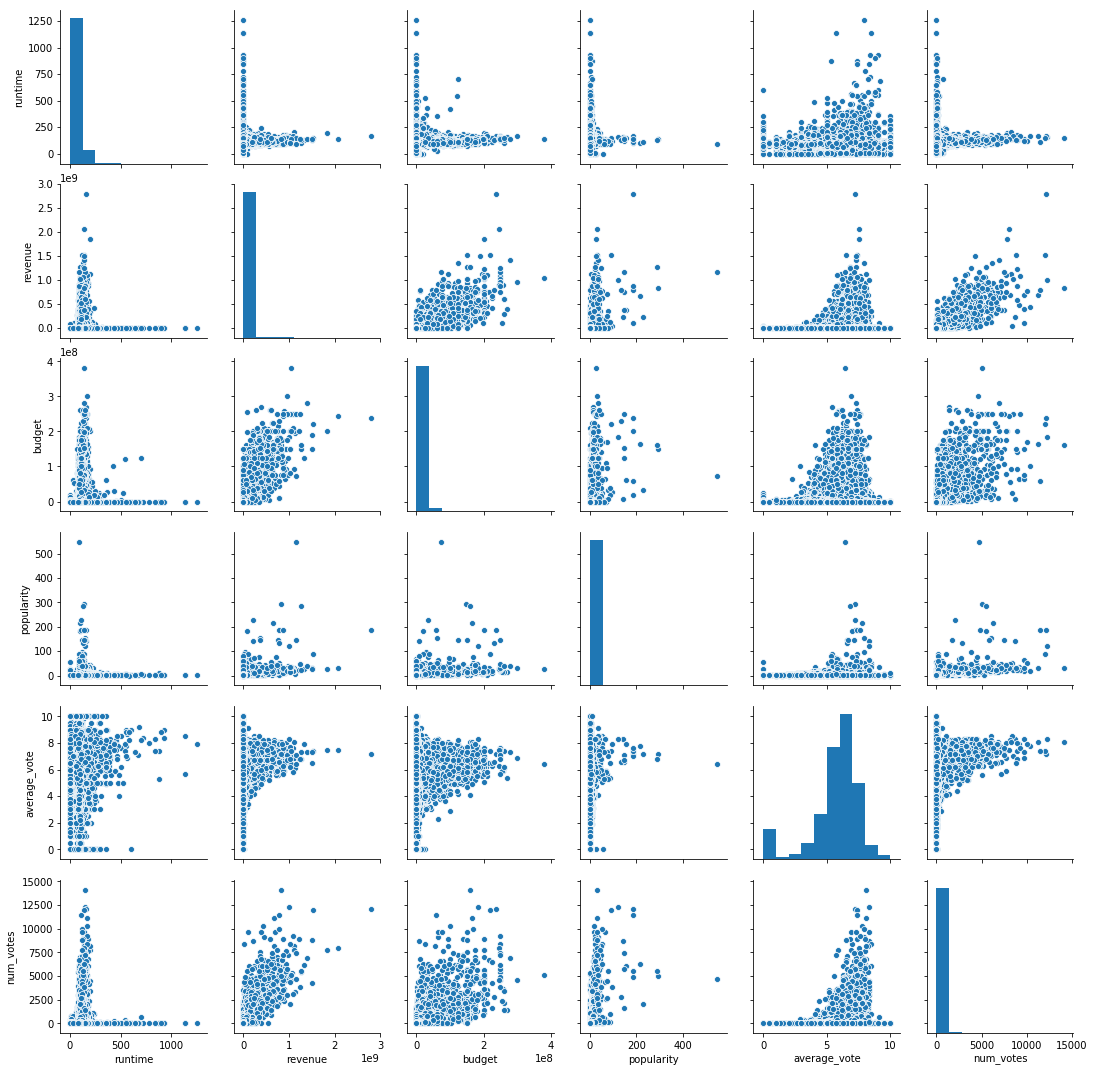

In [52]:
sns.pairplot(df)

In [53]:
df[df['average_vote']==df['average_vote'].min()]

,title,genres,date,runtime,revenue,budget,director,cast,popularity,average_vote,num_votes,language
83,Last Summer in the Hamptons,NaN,1995-11-22,108.0,0.0,0,Henry Jaglom,"Victoria Foyt, Viveca Lindfors, Jon Robin Bait...",0.531159,0.0,0.0,en
107,Headless Body in Topless Bar,crime,1995-05-20,110.0,0.0,0,James Bruce,"Raymond J. Barry, Rustam Branaman, Jennifer Ma...",0.001346,0.0,0.0,en
126,Jupiter's Wife,NaN,1995-01-01,87.0,0.0,0,Michel Negroponte,Maggie Cogan,0.001178,0.0,0.0,en
132,Sonic Outlaws,"music, documentary",1995-08-01,87.0,0.0,0,Craig Baldwin,"Lloyd Dunn, Chris Grigg, Mark Hosler, Don Joyc...",0.001838,0.0,0.0,en
137,Target,NaN,1995-08-01,122.0,0.0,0,Sandip Ray,NaN,0.001205,0.0,0.0,en
...,...,...,...,...,...,...,...,...,...,...,...,...
46594,Altar of Fire,documentary,1976-01-01,45.0,0.0,0,Robert Gardner,NaN,0.000000,0.0,0.0,en
46596,The Wonders of Aladdin,NaN,1961-10-31,93.0,0.0,0,Mario Bava,"Donald O'Connor, Noëlle Adam, Vittorio De Sica...",0.093498,0.0,0.0,en
46614,Deep Hearts,documentary,1981-01-01,58.0,0.0,0,Robert Gardner,NaN,0.011025,0.0,0.0,en
46626,Satan Triumphant,NaN,1917-10-21,87.0,0.0,0,Yakov Protazanov,"Iwan Mosschuchin, Nathalie Lissenko, Pavel Pav...",0.003503,0.0,0.0,en


### 3121 movies have no votes , not zero rating.  

In [54]:
df['date'] = df['date'].apply(pd.to_datetime)

In [55]:
df.set_index('date',inplace=True)

In [56]:
df.head(3)

,title,genres,runtime,revenue,budget,director,cast,popularity,average_vote,num_votes,language
date,,,,,,,,,,,
1995-10-30,Toy Story,"animation, comedy, family",81.0,373554033.0,30000000,John Lasseter,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",21.946943,7.7,5415.0,en
1995-12-15,Jumanji,"adventure, fantasy, family",104.0,262797249.0,65000000,Joe Johnston,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",17.015539,6.9,2413.0,en
1995-12-22,Grumpier Old Men,"romance, comedy",101.0,0.0,0,Howard Deutch,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...",11.712900,6.5,92.0,en


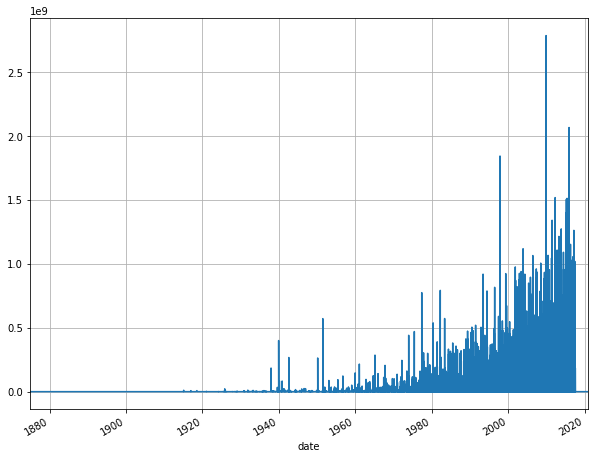

In [57]:

plt.rcParams['figure.figsize'] = (10, 8)   
df['revenue'].plot(grid = True)

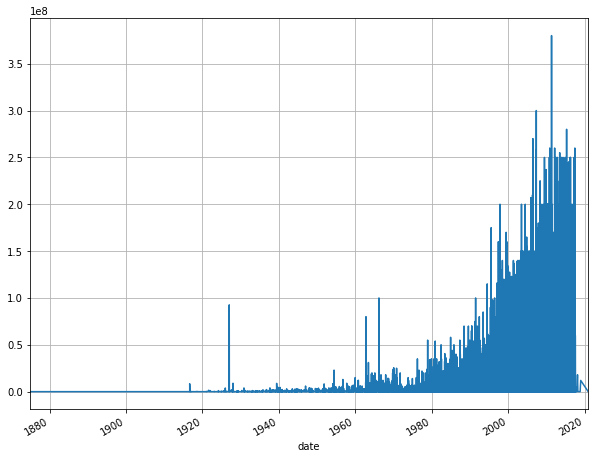

In [58]:
plt.rcParams['figure.figsize'] = (10, 8)   
df['budget'].plot(grid = True)

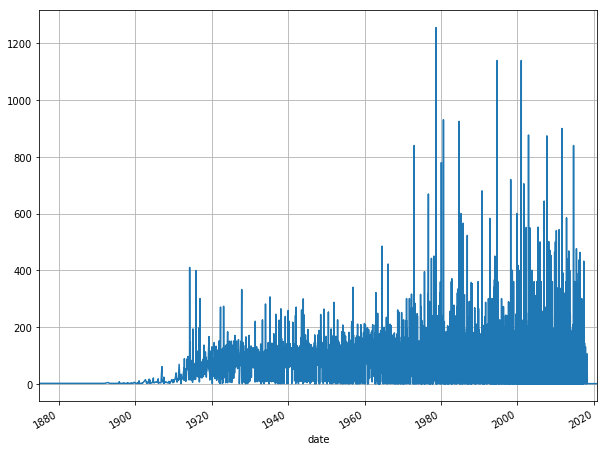

In [59]:
plt.rcParams['figure.figsize'] = (10, 8)   
df['runtime'].plot(grid = True)

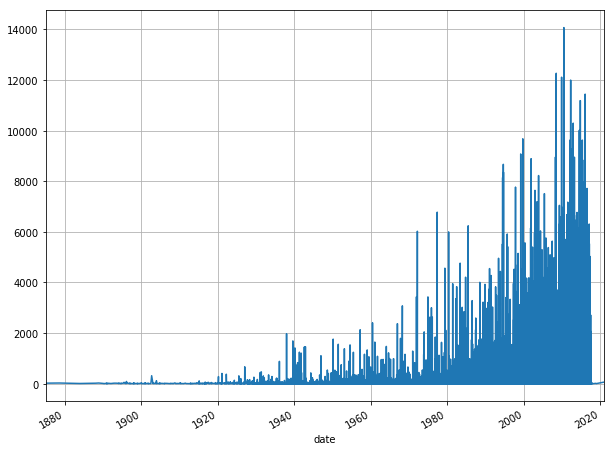

In [60]:
plt.rcParams['figure.figsize'] = (10, 8)   
df['num_votes'].plot(grid = True)

# Most Profitable Year - 2009 

In [61]:
df.loc[df['revenue'].idxmax()]

,title,genres,runtime,revenue,budget,director,cast,popularity,average_vote,num_votes,language
date,,,,,,,,,,,
2009-12-10,Invictus,"drama, history",134.0,1.222340e+08,60000000,Clint Eastwood,"Morgan Freeman, Matt Damon, Tony Kgoroge, Patr...",9.109838,7.0,1150.0,en
2009-12-10,Avatar,"action, adventure, fantasy, science fiction",162.0,2.787965e+09,237000000,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",185.070892,7.2,12114.0,en
2009-12-10,The Storm Warriors,"action, adventure, fantasy",150.0,0.000000e+00,100000000,Danny Pang,"Aaron Kwok, Ekin Cheng, Kenny Ho, Nicholas Tse...",2.860376,5.3,20.0,cn
2009-12-10,Sins of My Father,"documentary, foreign",94.0,0.000000e+00,0,Nicolás Entel,NaN,0.549618,7.1,14.0,es
2009-12-10,Under the Mountain,"fantasy, adventure, drama",91.0,0.000000e+00,0,Jonathan King,"Sam Neill, Tom Cameron, Oliver Driver, Sophie ...",6.401471,4.2,16.0,en
2009-12-10,12 Paces without a Head,comedy,108.0,0.000000e+00,8500000,Sven Taddicken,"Ronald Zehrfeld, Matthias Schweighöfer, Franzi...",0.723258,7.2,9.0,de
2009-12-10,Unter Strom,comedy,NaN,0.000000e+00,0,Zoltan Paul,"Harald Krassnitzer, Catrin Striebeck, Anna Fis...",0.327866,6.0,1.0,de


All movies in 2009 are displayed because date is indexed. 

# Least profitable year - 1995

In [62]:
df.loc[df['revenue'].idxmin()]

,title,genres,runtime,revenue,budget,director,cast,popularity,average_vote,num_votes,language
date,,,,,,,,,,,
1995-12-22,Grumpier Old Men,"romance, comedy",101.0,0.0,0,Howard Deutch,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...",11.712900,6.5,92.0,en
1995-12-22,Waiting to Exhale,"comedy, drama, romance",127.0,81452156.0,16000000,Forest Whitaker,"Whitney Houston, Angela Bassett, Loretta Devin...",3.859495,6.1,34.0,en
1995-12-22,Tom and Huck,"action, adventure, drama, family",97.0,0.0,0,Peter Hewitt,"Jonathan Taylor Thomas, Brad Renfro, Rachael L...",2.561161,5.4,45.0,en
1995-12-22,Sudden Death,"action, adventure, thriller",106.0,64350171.0,35000000,Peter Hyams,"Jean-Claude Van Damme, Powers Boothe, Dorian H...",5.231580,5.5,174.0,en
1995-12-22,Dracula: Dead and Loving It,"comedy, horror",88.0,0.0,0,Mel Brooks,"Leslie Nielsen, Mel Brooks, Amy Yasbeck, Peter...",5.430331,5.7,210.0,en
1995-12-22,Balto,"family, animation, adventure",78.0,11348324.0,0,Simon Wells,"Kevin Bacon, Bob Hoskins, Bridget Fonda, Jim C...",12.140733,7.1,423.0,en
1995-12-22,Nixon,"history, drama",192.0,13681765.0,44000000,Oliver Stone,"Anthony Hopkins, Joan Allen, Powers Boothe, Ed...",5.092000,7.1,72.0,en
1995-12-22,Cutthroat Island,"action, adventure",119.0,10017322.0,98000000,Renny Harlin,"Geena Davis, Matthew Modine, Frank Langella, M...",7.284477,5.7,137.0,en
1995-12-22,Adam and Eve,drama,104.0,0.0,0,Joaquim Leitão,"Maria de Medeiros, Joaquim de Almeida, Karra E...",0.151042,6.0,3.0,pt


In [63]:
n = 10
df['language'].value_counts()[:n].index.tolist()

['en', 'fr', 'it', 'ja', 'de', 'es', 'ru', 'hi', 'ko', 'zh']

In [104]:
n = 10
df['director'].value_counts()[:n].index.tolist()

['John Ford',
 'Michael Curtiz',
 'Werner Herzog',
 'Julien Duvivier',
 'Alfred Hitchcock',
 'Georges Méliès',
 'Woody Allen',
 'Frank Capra',
 'Jean-Luc Godard',
 'Sidney Lumet']

In [102]:
df.reset_index()

,index,id,title,tagline,description,genres,keywords,date,collection,runtime,...,director,cast,production_companies,production_countries,popularity,average_vote,num_votes,language,imdb_id,poster_url
0,0,862,Toy Story,NaN,"Led by Woody, Andy's toys live happily in his ...","animation, comedy, family","jealousy, toy, boy, friendship, friends, rival...",1995-10-30,Toy Story Collection,81.0,...,John Lasseter,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",Pixar Animation Studios,United States of America,21.946943,7.7,5415.0,en,tt0114709,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1,1,8844,Jumanji,Roll the dice and unleash the excitement!,When siblings Judy and Peter discover an encha...,"adventure, fantasy, family","board game, disappearance, based on children's...",1995-12-15,NaN,104.0,...,Joe Johnston,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","TriStar Pictures, Teitler Film, Interscope Com...",United States of America,17.015539,6.9,2413.0,en,tt0113497,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2,2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,A family wedding reignites the ancient feud be...,"romance, comedy","fishing, best friend, duringcreditsstinger, ol...",1995-12-22,Grumpy Old Men Collection,101.0,...,Howard Deutch,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...","Warner Bros., Lancaster Gate",United States of America,11.712900,6.5,92.0,en,tt0113228,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
3,3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,"Cheated on, mistreated and stepped on, the wom...","comedy, drama, romance","based on novel, interracial relationship, sing...",1995-12-22,NaN,127.0,...,Forest Whitaker,"Whitney Houston, Angela Bassett, Loretta Devin...",Twentieth Century Fox Film Corporation,United States of America,3.859495,6.1,34.0,en,tt0114885,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg
4,4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,Just when George Banks has recovered from his ...,comedy,"baby, midlife crisis, confidence, aging, daugh...",1995-02-10,Father of the Bride Collection,106.0,...,Charles Shyer,"Steve Martin, Diane Keaton, Martin Short, Kimb...","Sandollar Productions, Touchstone Pictures",United States of America,8.387519,5.7,173.0,en,tt0113041,/e64sOI48hQXyru7naBFyssKFxVd.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46623,46623,439050,Subdue,Rising and falling between a man and woman,Rising and falling between a man and woman.,"drama, family",tragic love,NaN,NaN,90.0,...,Hamid Nematollah,"Leila Hatami, Kourosh Tahami, Elham Korda",NaN,Iran,0.072051,4.0,1.0,fa,tt6209470,/jldsYflnId4tTWPx8es3uzsB1I8.jpg
46624,46624,111109,Century of Birthing,NaN,An artist struggles to finish his work while a...,drama,"artist, play, pinoy",2011-11-17,NaN,360.0,...,Lav Diaz,"Angel Aquino, Perry Dizon, Hazel Orencio, Joel...",Sine Olivia,Philippines,0.178241,9.0,3.0,tl,tt2028550,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg
46625,46625,67758,Betrayal,A deadly game of wits.,"When one of her hits goes wrong, a professiona...","action, drama, thriller",NaN,2003-08-01,NaN,90.0,...,Mark L. Lester,"Erika Eleniak, Adam Baldwin, Julie du Page, Ja...",American World Pictures,United States of America,0.903007,3.8,6.0,en,tt0303758,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg
46626,46626,227506,Satan Triumphant,NaN,"In a small town live two brothers, one a minis...",NaN,NaN,1917-10-21,NaN,87.0,...,Yakov Protazanov,"Iwan Mosschuchin, Nathalie Lissenko, Pavel Pav...",Yermoliev,Russia,0.003503,0.0,0.0,en,tt0008536,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg


In [66]:
df.set_index('director',inplace=False)
df.head(3)

,title,genres,runtime,revenue,budget,cast,popularity,average_vote,num_votes,language
director,,,,,,,,,,
John Lasseter,Toy Story,"animation, comedy, family",81.0,373554033.0,30000000,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",21.946943,7.7,5415.0,en
Joe Johnston,Jumanji,"adventure, fantasy, family",104.0,262797249.0,65000000,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",17.015539,6.9,2413.0,en
Howard Deutch,Grumpier Old Men,"romance, comedy",101.0,0.0,0,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...",11.712900,6.5,92.0,en


In [67]:
df.loc[df['revenue'].idxmax()]

,title,genres,runtime,revenue,budget,cast,popularity,average_vote,num_votes,language
director,,,,,,,,,,
James Cameron,True Lies,"action, thriller",141.0,3.788824e+08,115000000,"Arnold Schwarzenegger, Jamie Lee Curtis, Tom A...",11.396099,6.8,1138.0,en
James Cameron,Terminator 2: Judgment Day,"action, thriller, science fiction",137.0,5.200000e+08,100000000,"Arnold Schwarzenegger, Linda Hamilton, Robert ...",22.661695,7.7,4274.0,en
James Cameron,The Abyss,"adventure, action, thriller, science fiction",139.0,9.000010e+07,70000000,"Ed Harris, Mary Elizabeth Mastrantonio, Michae...",9.809585,7.1,822.0,en
James Cameron,Aliens,"horror, action, thriller, science fiction",137.0,1.833165e+08,18500000,"Sigourney Weaver, Michael Biehn, James Remar, ...",21.761179,7.7,3282.0,en
James Cameron,The Terminator,"action, thriller, science fiction",108.0,7.837120e+07,6400000,"Arnold Schwarzenegger, Michael Biehn, Linda Ha...",19.293562,7.4,4208.0,en
James Cameron,Titanic,"drama, romance, thriller",194.0,1.845034e+09,200000000,"Kate Winslet, Leonardo DiCaprio, Frances Fishe...",26.889070,7.5,7770.0,en
James Cameron,Piranha Part Two: The Spawning,horror,84.0,0.000000e+00,145786,"Tricia O'Neil, Steve Marachuk, Lance Henriksen...",3.468843,3.9,41.0,en
James Cameron,Ghosts of the Abyss,documentary,92.0,1.704087e+07,13000000,"Bill Paxton, John Broadwater, James Cameron, M...",4.835446,7.1,39.0,en
James Cameron,Aliens of the Deep,"action, documentary, science fiction",47.0,0.000000e+00,0,"Anatoly M. Sagalevitch, Pamela Conrad, James C...",1.924682,6.8,19.0,en


#### James Cameron's movies made the most money over the years. 

# How much money did a particular director's movies make over the years?

In [78]:
JF = df.loc['John Ford']

In [79]:
JF

,title,genres,runtime,revenue,budget,cast,popularity,average_vote,num_votes,language
director,,,,,,,,,,
John Ford,The Quiet Man,"comedy, drama, romance",129.0,0.0,0,"John Wayne, Maureen O'Hara, Victor McLaglen, B...",8.762386,7.3,118.0,en
John Ford,How Green Was My Valley,drama,118.0,6000000.0,1250000,"Walter Pidgeon, Maureen O'Hara, Roddy McDowall...",9.058578,6.9,76.0,en
John Ford,Mister Roberts,"comedy, drama, family, war",123.0,0.0,0,"Henry Fonda, James Cagney, William Powell, Jac...",2.593458,7.3,43.0,en
John Ford,The Grapes of Wrath,drama,129.0,0.0,750000,"Henry Fonda, Jane Darwell, John Carradine, Cha...",9.668636,7.8,211.0,en
John Ford,The Searchers,western,119.0,0.0,3750000,"John Wayne, Jeffrey Hunter, Vera Miles, Natali...",7.803856,7.7,332.0,en
...,...,...,...,...,...,...,...,...,...,...
John Ford,Men Without Women,"drama, action",77.0,0.0,0,"Frank Albertson, J. Farrell MacDonald, Warren ...",0.662595,4.7,3.0,en
John Ford,The Rising of the Moon,"comedy, drama",81.0,0.0,0,"Tyrone Power, Denis O'Dea, Cyril Cusack, Noel ...",0.365754,6.4,4.0,en
John Ford,Submarine Patrol,"adventure, drama",95.0,0.0,0,"Richard Greene, Nancy Kelly, Preston Foster, G...",0.928714,5.0,2.0,en


In [82]:
JF.sum(axis=0)

title           The Quiet ManHow Green Was My ValleyMister Rob...
runtime                                                      6633
revenue                                               8.51708e+07
budget                                                   35617374
cast            John Wayne, Maureen O'Hara, Victor McLaglen, B...
popularity                                                202.023
average_vote                                                426.2
num_votes                                                    2212
language        enenenenenenenenenenenenenenenenenesenenenenen...
dtype: object

### John Ford's movies made 85 million dollars over the years. 

# Movies rated 7 and above 

In [86]:
criteria = df[df['average_vote'] >= 7.0]

In [89]:
criteria

,title,genres,runtime,revenue,budget,cast,popularity,average_vote,num_votes,language
director,,,,,,,,,,
John Lasseter,Toy Story,"animation, comedy, family",81.0,373554033.0,30000000,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",21.946943,7.7,5415.0,en
Michael Mann,Heat,"action, crime, drama, thriller",170.0,187436818.0,60000000,"Al Pacino, Robert De Niro, Val Kilmer, Jon Voi...",17.924927,7.7,1886.0,en
Simon Wells,Balto,"family, animation, adventure",78.0,11348324.0,0,"Kevin Bacon, Bob Hoskins, Bridget Fonda, Jim C...",12.140733,7.1,423.0,en
Oliver Stone,Nixon,"history, drama",192.0,13681765.0,44000000,"Anthony Hopkins, Joan Allen, Powers Boothe, Ed...",5.092000,7.1,72.0,en
Martin Scorsese,Casino,"drama, crime",178.0,116112375.0,52000000,"Robert De Niro, Sharon Stone, Joe Pesci, James...",10.137389,7.8,1343.0,en
...,...,...,...,...,...,...,...,...,...,...
Beth David,In a Heartbeat,"family, animation, romance, comedy",4.0,0.0,0,NaN,20.821780,8.3,146.0,en
Georges Méliès,The Man with the Rubber Head,"comedy, fantasy, science fiction",3.0,0.0,0,Georges Méliès,1.618458,7.6,29.0,fr
Ben Rock,Shadow of the Blair Witch,"mystery, horror",45.0,0.0,0,"Tony Abatemarco, Andre Brooks, Mariclare Coste...",0.076061,7.0,2.0,en


In [93]:
df.reset_index()


,director,title,genres,runtime,revenue,budget,cast,popularity,average_vote,num_votes,language
0,John Lasseter,Toy Story,"animation, comedy, family",81.0,373554033.0,30000000,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",21.946943,7.7,5415.0,en
1,Joe Johnston,Jumanji,"adventure, fantasy, family",104.0,262797249.0,65000000,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",17.015539,6.9,2413.0,en
2,Howard Deutch,Grumpier Old Men,"romance, comedy",101.0,0.0,0,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...",11.712900,6.5,92.0,en
3,Forest Whitaker,Waiting to Exhale,"comedy, drama, romance",127.0,81452156.0,16000000,"Whitney Houston, Angela Bassett, Loretta Devin...",3.859495,6.1,34.0,en
4,Charles Shyer,Father of the Bride Part II,comedy,106.0,76578911.0,0,"Steve Martin, Diane Keaton, Martin Short, Kimb...",8.387519,5.7,173.0,en
...,...,...,...,...,...,...,...,...,...,...,...
46623,Hamid Nematollah,Subdue,"drama, family",90.0,0.0,0,"Leila Hatami, Kourosh Tahami, Elham Korda",0.072051,4.0,1.0,fa
46624,Lav Diaz,Century of Birthing,drama,360.0,0.0,0,"Angel Aquino, Perry Dizon, Hazel Orencio, Joel...",0.178241,9.0,3.0,tl
46625,Mark L. Lester,Betrayal,"action, drama, thriller",90.0,0.0,0,"Erika Eleniak, Adam Baldwin, Julie du Page, Ja...",0.903007,3.8,6.0,en
46626,Yakov Protazanov,Satan Triumphant,NaN,87.0,0.0,0,"Iwan Mosschuchin, Nathalie Lissenko, Pavel Pav...",0.003503,0.0,0.0,en


# Most Profitable Genre - 
Single movie has multiple genres. Difficult to filter.

In [106]:
df.loc[df['revenue'].idxmax()]

id                                                                  19995
title                                                              Avatar
tagline                                       Enter the World of Pandora.
description             In the 22nd century, a paraplegic Marine is di...
genres                        action, adventure, fantasy, science fiction
keywords                culture clash, future, space war, space colony...
date                                                           2009-12-10
collection                                              Avatar Collection
runtime                                                               162
revenue                                                       2.78797e+09
budget                                                          237000000
director                                                    James Cameron
cast                    Sam Worthington, Zoe Saldana, Sigourney Weaver...
production_companies    Ingenious Film

In [6]:
rev = df.sort_values('revenue', ascending=False)
rev.head()

,id,title,tagline,description,genres,keywords,date,collection,runtime,revenue,...,director,cast,production_companies,production_countries,popularity,average_vote,num_votes,language,imdb_id,poster_url
14723,19995,Avatar,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...","action, adventure, fantasy, science fiction","culture clash, future, space war, space colony...",2009-12-10,Avatar Collection,162.0,2.787965e+09,...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",185.070892,7.2,12114.0,en,tt0499549,/kmcqlZGaSh20zpTbuoF0Cdn07dT.jpg
26770,140607,Star Wars: The Force Awakens,Every generation has a story.,Thirty years after defeating the Galactic Empi...,"action, adventure, science fiction, fantasy","android, spaceship, jedi, imax, space opera, 3d",2015-12-15,Star Wars Collection,136.0,2.068224e+09,...,J.J. Abrams,"Daisy Ridley, John Boyega, Adam Driver, Harris...","Lucasfilm, Truenorth Productions, Bad Robot",United States of America,31.626013,7.5,7993.0,en,tt2488496,/weUSwMdQIa3NaXVzwUoIIcAi85d.jpg
1659,597,Titanic,Nothing on Earth could come between them.,"84 years later, a 101-year-old woman named Ros...","drama, romance, thriller","shipwreck, iceberg, ship, panic, titanic, ocea...",1997-11-18,NaN,194.0,1.845034e+09,...,James Cameron,"Kate Winslet, Leonardo DiCaprio, Frances Fishe...","Paramount Pictures, Twentieth Century Fox Film...",United States of America,26.889070,7.5,7770.0,en,tt0120338,/kHXEpyfl6zqn8a6YuozZUujufXf.jpg
18008,24428,The Avengers,Some assembly required.,When an unexpected enemy emerges and threatens...,"science fiction, action, adventure","new york, shield, marvel comic, superhero, bas...",2012-04-25,The Avengers Collection,143.0,1.519558e+09,...,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...","Paramount Pictures, Marvel Studios",United States of America,89.887648,7.4,12000.0,en,tt0848228,/cezWGskPY5x7GaglTTRN4Fugfb8.jpg
25285,135397,Jurassic World,The park is open.,Twenty-two years after the events of Jurassic ...,"action, adventure, science fiction, thriller","monster, dna, tyrannosaurus rex, velociraptor,...",2015-06-09,Jurassic Park Collection,124.0,1.513529e+09,...,Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...","Universal Studios, Amblin Entertainment, Legen...",United States of America,32.790475,6.5,8842.0,en,tt0369610,/jjBgi2r5cRt36xF6iNUEhzscEcb.jpg


# 10 Most Profitable Movies

Text(0.5, 1.0, 'Most Expensive Movies')

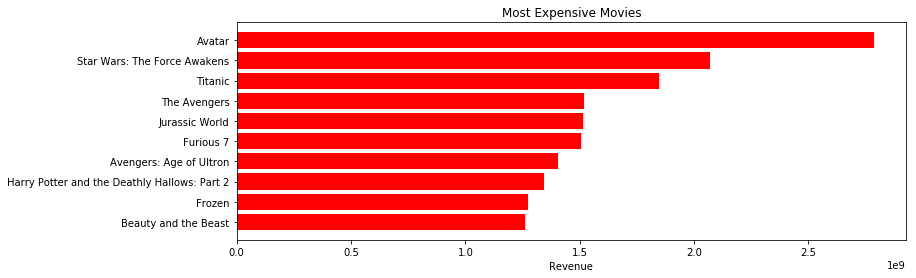

In [15]:
plt.figure(figsize=(12,4))

plt.barh(rev['title'].head(10),rev['revenue'].head(10),
        color='red')
plt.gca().invert_yaxis()
plt.xlabel("Revenue")
plt.title("Most Expensive Movies")

In [26]:
time = df.sort_values('runtime', ascending=False)


# Longest Movies 

Text(0.5, 1.0, 'Longest Movies')

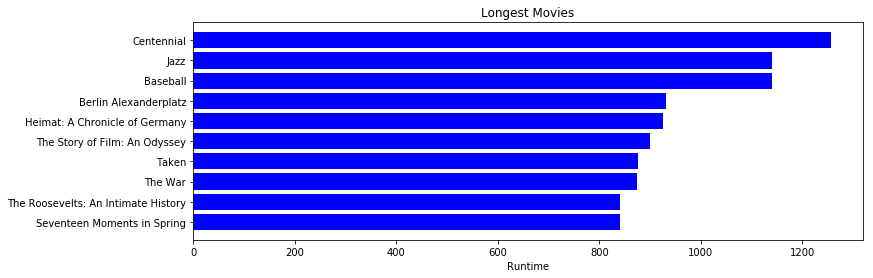

In [21]:
plt.figure(figsize=(12,4))

plt.barh(time['title'].head(10),time['runtime'].head(10),
        color='blue')
plt.gca().invert_yaxis()
plt.xlabel("Runtime")
plt.title("Longest Movies")

# 10 Most Popular Movies

In [27]:
pop = df.sort_values('popularity', ascending=False)

Text(0.5, 1.0, 'Most Popular Movies')

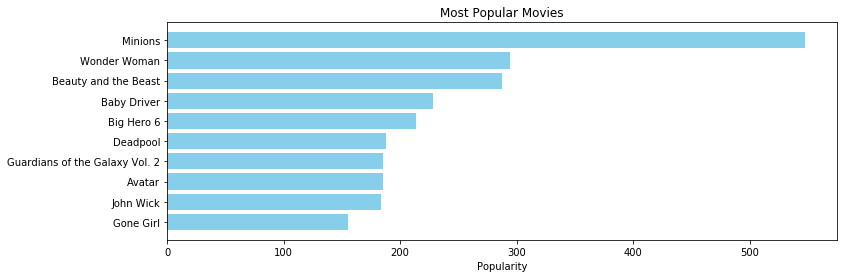

In [28]:
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(10),pop['popularity'].head(10),
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Most Popular Movies")

Text(0.5, 1.0, 'Movies with Most Votes')

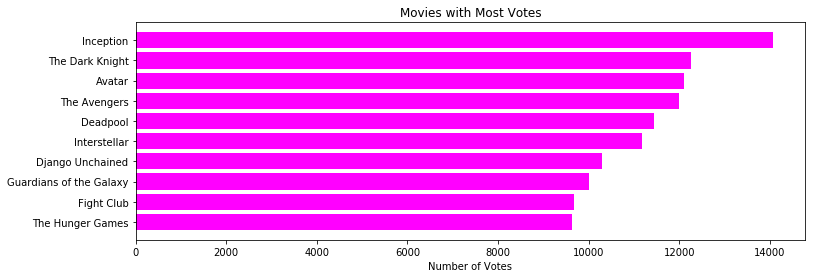

In [29]:
votes = df.sort_values('num_votes', ascending=False)

plt.figure(figsize=(12,4))

plt.barh(votes['title'].head(10),votes['num_votes'].head(10),
        color='magenta')
plt.gca().invert_yaxis()
plt.xlabel("Number of Votes")
plt.title("Movies with Most Votes")